# Publication Data

In [1]:
library(ISLR2)
library(survival)

The `Publication` data presented in Section 11.5.4 can be found in the `LSLR2` library. We first reproduce Figure 11.5 by plotting the Kaplan-Meier curves stratified on the `posres` variable, which records whether the study had a positive or negative result.

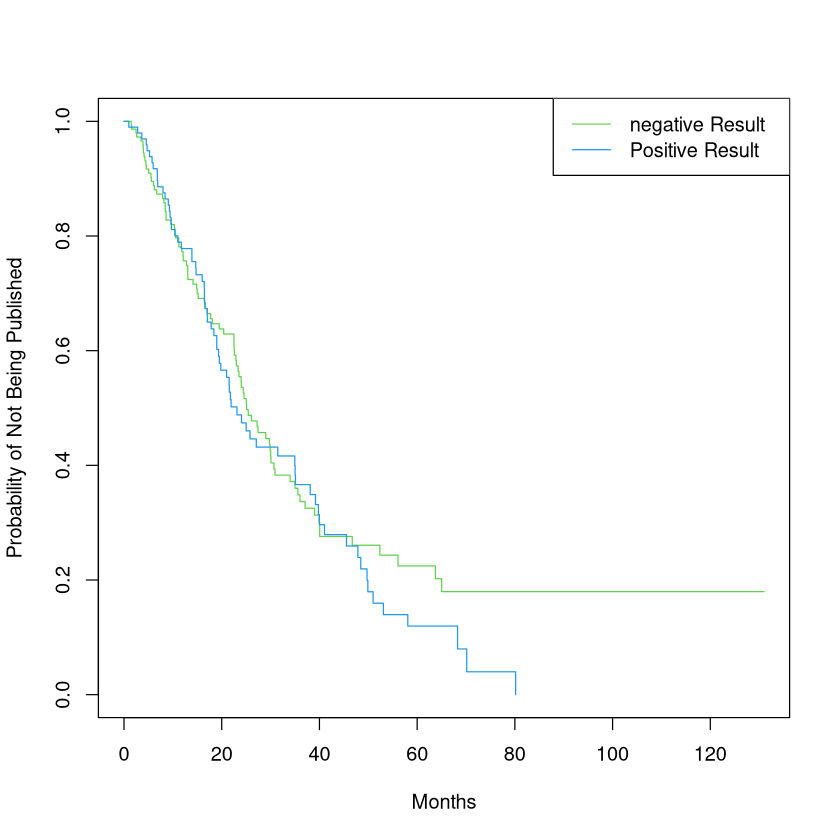

In [2]:
fit.posres <- survfit(
    Surv(time, status) ~ posres, data = Publication
)
plot(fit.posres, xlab = "Months",
     ylab = "Probability of Not Being Published", col = 3:4)
legend("topright", c("negative Result", "Positive Result"),
       col = 3:4, lty = 1)

As discussed previously, the _p_-values from fitting Cox's proportional hazards model to the `posres` variable are quite large, providing no evidence of a difference in time-to-publication between studies with positive versus negative results.

In [3]:
fit.pub <- coxph(Surv(time, status) ~ posres,
                 data = Publication)
fit.pub

Call:
coxph(formula = Surv(time, status) ~ posres, data = Publication)

         coef exp(coef) se(coef)     z    p
posres 0.1481    1.1596   0.1616 0.916 0.36

Likelihood ratio test=0.83  on 1 df, p=0.3611
n= 244, number of events= 156 

As expected, the log-rank test provides an identical conclusion.

In [4]:
logrank.test <- survdiff(Surv(time, status) ~ posres,
                         data = Publication)
logrank.test

Call:
survdiff(formula = Surv(time, status) ~ posres, data = Publication)

           N Observed Expected (O-E)^2/E (O-E)^2/V
posres=0 146       87     92.6     0.341     0.844
posres=1  98       69     63.4     0.498     0.844

 Chisq= 0.8  on 1 degrees of freedom, p= 0.4 

However, the results change dramatically when we include other predictors in the model. Here we have excluded the funding mechanism variable.

In [5]:
fit.pub2 <- coxph(Surv(time, status) ~ . - mech,
                  data = Publication)
fit.pub2

Call:
coxph(formula = Surv(time, status) ~ . - mech, data = Publication)

               coef  exp(coef)   se(coef)      z       p
posres    5.708e-01  1.770e+00  1.760e-01  3.244 0.00118
multi    -4.086e-02  9.600e-01  2.512e-01 -0.163 0.87079
clinend   5.462e-01  1.727e+00  2.620e-01  2.085 0.03710
sampsize  4.678e-06  1.000e+00  1.472e-05  0.318 0.75070
budget    4.385e-03  1.004e+00  2.465e-03  1.779 0.07518
impact    5.832e-02  1.060e+00  6.676e-03  8.735 < 2e-16

Likelihood ratio test=149.2  on 6 df, p=< 2.2e-16
n= 244, number of events= 156 

We see that there are a number of statistically significant variables, including whether the trial focused on a clinical endpoint, the impact of the study, and whether the study has positive or negative results.